In [34]:
import tensorflow as tf
import pickle 
import util
import numpy as np
import matplotlib.pyplot as plt

In [35]:
with open('../delta_hists.pickle', 'rb') as f:
    delta_hists = pickle.load(f)

In [42]:
hists_var=[]
for v in range(len(delta_hists[0])):
    dicts={"counts":[],"nbins":[],"range":[]}
    hists_var.append(dicts)

for j,delta_hist_ittr in enumerate(delta_hists):
    
    for i,delta_hist_var in enumerate(delta_hist_ittr):
        hists_var[i]
        count=delta_hist_var["counts"]
        nbins=delta_hist_var["nbins"]
        ranges=delta_hist_var["range"]
        hists_var[i]["counts"].append(count)
        hists_var[i]["nbins"].append(nbins)
        hists_var[i]["range"].append(ranges)

In [43]:
hist_dict = hists_var[0]

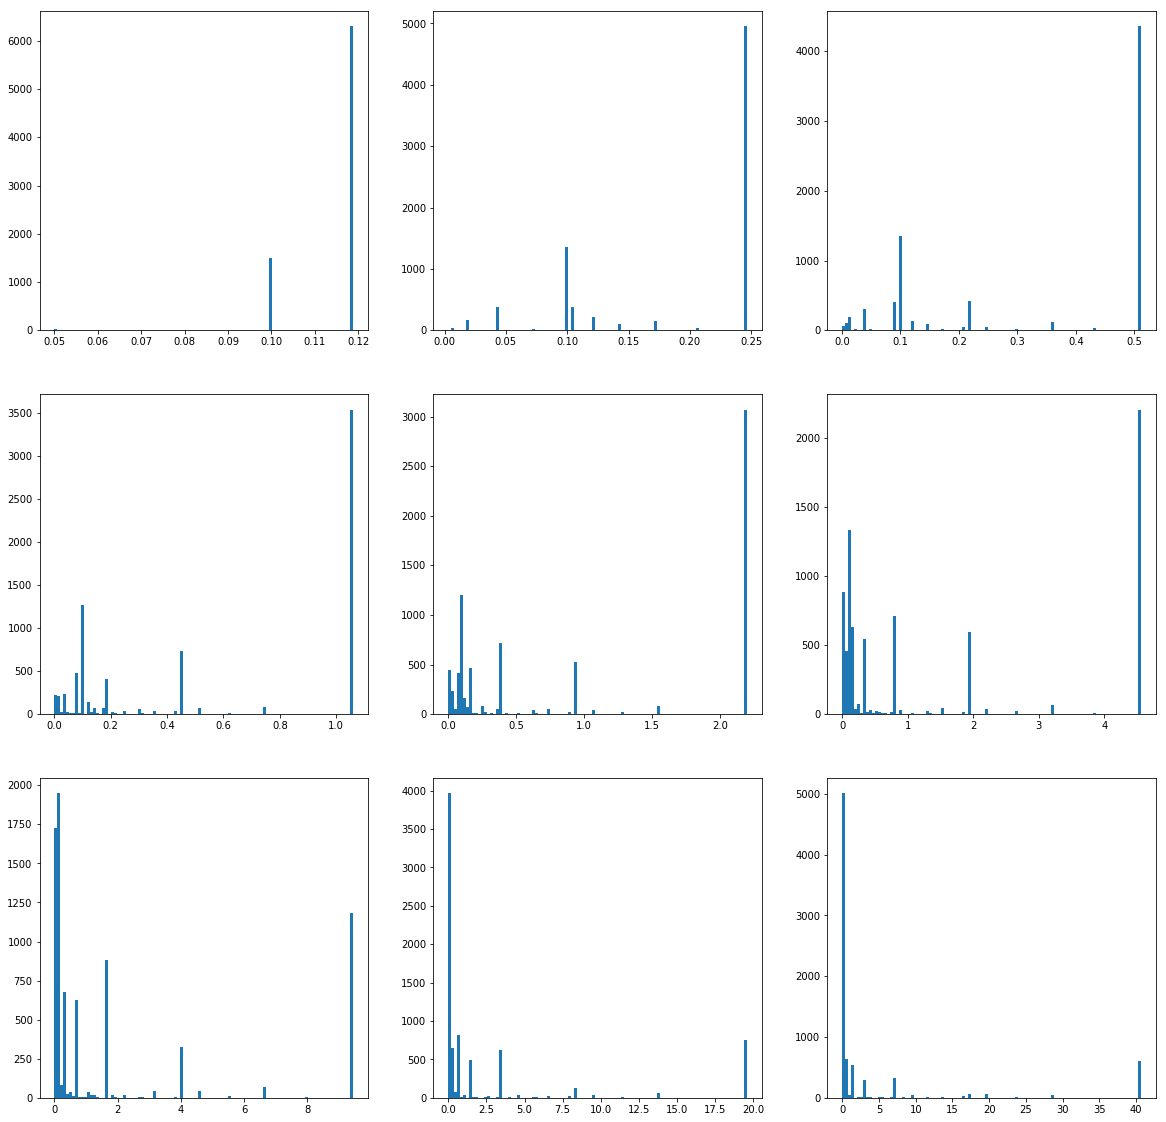

In [45]:
fig = plt.figure(figsize=(20,20))
for i in range(9):
    fig.add_subplot(3,3,i+1)
    counts=hist_dict["counts"][i*4]
    nbins=hist_dict["nbins"][i*4]
    min_x,max_x= hist_dict["range"][i*4]
    bins = np.linspace(min_x,max_x,nbins+1)
    centroids = (bins[1:] + bins[:-1]) / 2
    counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                                 weights=counts, range=(min(bins), max(bins)))
plt.show()